<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/assignment_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**LOADING DATASET**

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/flipkart (1).csv")
data

,NAME,Storage,RAM,Size,Price,binary_price
0,realme C11 2021,32,2,16.51,"7,499",1
1,realme C11 2021,32,2,16.51,"7,499",1
2,realme C11 2021,64,4,16.51,"8,999",1
3,POCO C31,64,4,16.59,"8,999",1
4,realme C21Y,32,3,16.51,"9,499",1
5,realme C21Y,32,3,16.51,"9,499",1
6,realme C21Y,64,4,16.51,"10,499",1
7,realme C20,32,2,16.51,"6,999",0
8,realme C20,32,2,16.51,"7,499",1
9,realme C11 2021,64,4,16.51,"8,999",1


**CONVERTING PRICE FROM STRING TO FLOAT**

In [ ]:
def pricecon(m):
  m=m.replace(',','')
  return m
data['Price']=data['Price'].apply(pricecon)

**PREPARING DATA**

In [ ]:
x = data.drop(labels='Storage',axis=1)
x=data.drop(labels='NAME',axis=1)
y=data['Storage']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(x_train)
x_train= sc.transform(x_train)
sc.fit(x_test)
x_test= sc.transform(x_test)
x.shape

(39, 5)

**FINDING THE VALUE FOR K AND PLOTTING THE ERROR CURVE FOR THE TRAIN AND TEST SET**

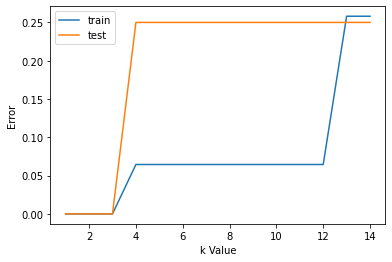

In [ ]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

**ACCURACY SCORE**

In [ ]:
knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.75